In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.optimize import curve_fit

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [4]:
rs = 42
file_path = "db\db-v1.4.2.csv"

In [5]:
df = pd.read_csv(file_path)

# df["Ns"] = (df["Q"] ** (0.5) * df["Speed"]) / (df["H"] ** (0.75) * 60)
# df = df[df["Type"].isin(["OH1", "OH2", "BB1", "BB2", "VS4"])][["Efficiency", "Q", "H"]].dropna()

df = df[df["Type"].isin(["OH1", "OH2", "BB1", 
                         "BB2", "VS4"])][["Q", "H", "Speed", "Efficiency", "Project", "Rated dia."]].dropna()

In [6]:
df["Poles"] = np.floor(3000 / df["Speed"]) * 2

In [7]:
df["H x P"] = np.sqrt(df["H"]) * df["Poles"]

In [8]:
X, y = df[["Q", "H x P"]].values, df["Rated dia."]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rs)

In [10]:
reg_names = ['Linear Regression', 'Ridge', 'Lasso', 'Bayseian Ridge', 'Random Forest']
regs = [LinearRegression(), SVR(), KernelRidge(), Ridge(), 
        Lasso(), ElasticNet(), BayesianRidge(), RandomForestRegressor()]

regressors = list(zip(reg_names, regs))

<AxesSubplot:xlabel='H x P', ylabel='Rated dia.'>

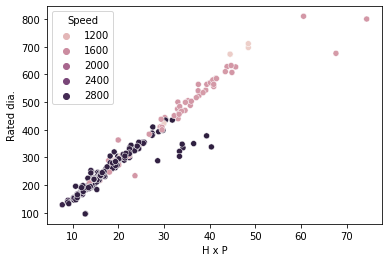

In [11]:
sns.scatterplot(x="H x P", y="Rated dia.", data=df, hue="Speed")

In [12]:
for n, r in regressors:
    print(n)
    pipe_reg = make_pipeline(StandardScaler(), r)
    scores = cross_val_score(pipe_reg, X, y, cv=5,
                             scoring='r2')
    print(scores)

Linear Regression
[0.86697924 0.96874482 0.93293997 0.95949032 0.94302659]
Ridge
[0.10393837 0.24662404 0.47678027 0.34420644 0.44755224]
Lasso
[-3.09094909 -1.92455933 -8.76591043 -4.52315252 -7.15369358]
Bayseian Ridge
[0.86841067 0.96841548 0.93246315 0.9590709  0.94262728]
Random Forest
[0.86730785 0.97013571 0.93222067 0.95882936 0.94289672]


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8596512134635076

In [14]:
Q_test, H_test, p_test = 2000, 10, 4
HxP_test = np.sqrt(H_test) * p_test
input = [[Q_test, HxP_test]]

In [15]:
lr.predict(input)

array([230.92888342])

In [16]:
from joblib import dump, load

In [17]:
dump(lr, 'model\dia_model.joblib')

['model\\dia_model.joblib']